# COVID-19 (India) Data Analysis and Visualization

This notebook uses data analysis and visualization to analyze the effects of the ongoing COVID-19 pandemic in India, and create visualizations for important observations made during the analysis.

**Language:** Python 3

**Dataset:** [COVID-19 in India](https://www.kaggle.com/sudalairajkumar/covid19-in-india)

I would like to thank [Sudalai Rajkumar (SRK)](https://www.kaggle.com/sudalairajkumar) for creating this dataset!

**Libraries:**
  * [_NumPy_](https://numpy.org/)
  * [_Pandas_](https://pandas.pydata.org/)
  * [_Seaborn_](https://seaborn.pydata.org/)
  * [_Matplotlib_](https://matplotlib.org/)

## Importing libraries

In [1]:
# import libraries for data analysis
import numpy as np
import pandas as pd

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style = 'whitegrid', rc = {'xtick.bottom': True, 'ytick.left': True})

## Reading, exploring and cleaning the data

In [2]:
# read data from the dataset into dataframes
age_group_details = pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')
covid_19_india = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')
hospital_beds_india = pd.read_csv('/kaggle/input/covid19-in-india/HospitalBedsIndia.csv')
icmr_testing_details = pd.read_csv('/kaggle/input/covid19-in-india/ICMRTestingDetails.csv')
individual_details = pd.read_csv('/kaggle/input/covid19-in-india/IndividualDetails.csv')
population_india_census_2011 = pd.read_csv('/kaggle/input/covid19-in-india/population_india_census2011.csv')

# explore each of the dataframes (below)

In [3]:
age_group_details.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [4]:
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
hospital_beds_india.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [6]:
icmr_testing_details.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf


In [7]:
individual_details.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [8]:
population_india_census_2011.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [9]:
# update the state name for Telangana
population_india_census_2011['State / Union Territory'] = population_india_census_2011['State / Union Territory'].apply(lambda name : 'Telangana' if name == 'Telengana' else name)

# update the district name for Ahmedabad
individual_details['detected_district'] = individual_details['detected_district'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

# udpate the city name for Ahmedabad
individual_details['detected_city'] = individual_details['detected_city'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

## Data analysis and visualization

### 1 Cumulative number of cases (categorised by current health status) grouped by date

#### 1.1 Creating a dataframe with number of cases (categorised by current health status) grouped by date [CUMULATIVE]

In [10]:
date_cumulative = covid_19_india.groupby('Date').sum()
date_cumulative.reset_index(inplace = True)

# change the date format to 'YYYY-MM-DD'
date_cumulative['Date'] = date_cumulative['Date'].apply(lambda date : '20' + '-'.join(date.split('/')[::-1]))

# sort the rows by date (in ascending order)
date_cumulative.sort_values('Date', inplace = True)

# calculate the number of active cases
date_cumulative['Active'] = date_cumulative['Confirmed'] - (date_cumulative['Cured'] + date_cumulative['Deaths'])

date_cumulative = date_cumulative[['Date', 'Confirmed', 'Cured', 'Deaths', 'Active']]

# dataframe with number of cases (categorised by current health status) grouped by date [CUMULATIVE]
date_cumulative.head()

,Date,Confirmed,Cured,Deaths,Active
70,2020-01-30,1,0,0,1
72,2020-01-31,1,0,0,1
0,2020-02-01,2,0,0,2
3,2020-02-02,3,0,0,3
6,2020-02-03,3,0,0,3


#### 1.2 Plot

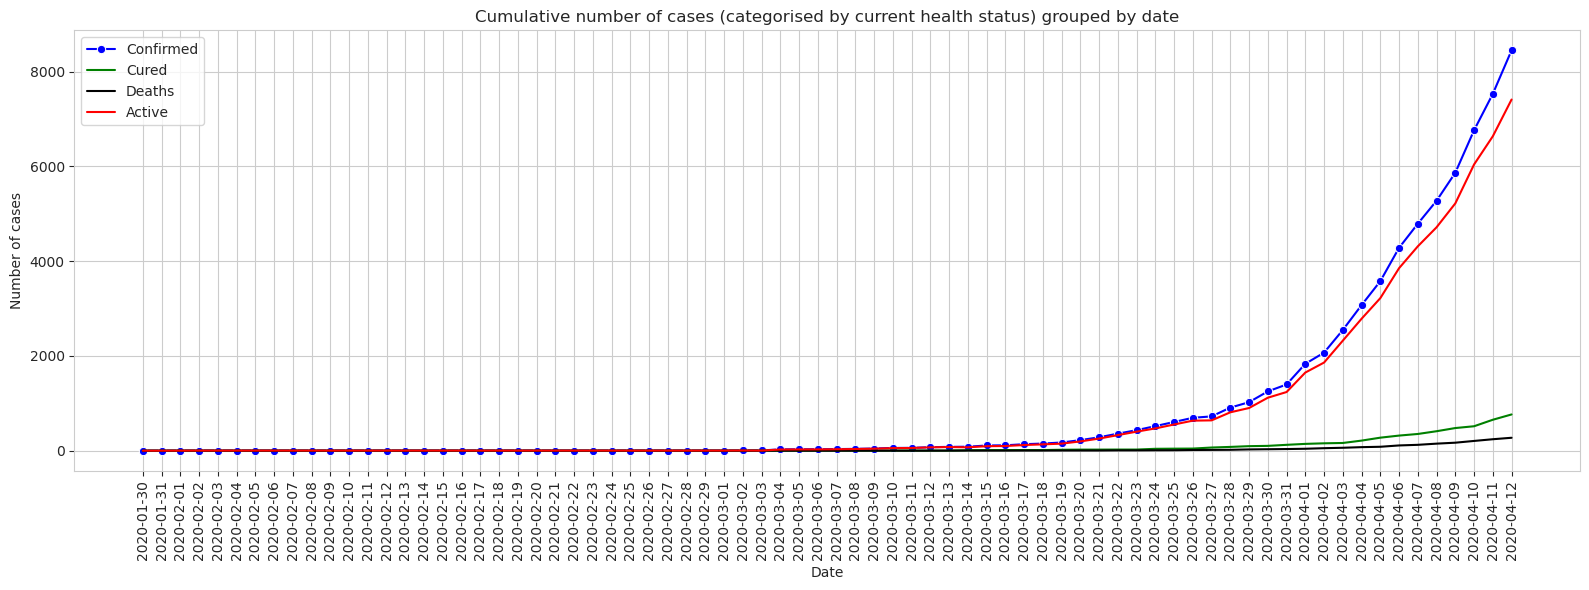

In [11]:
plt.figure(figsize=(16, 6), dpi = 100)
sns.lineplot(x = 'Date', y = 'Confirmed', data = date_cumulative, label = 'Confirmed', color = 'blue', marker = 'o')
sns.lineplot(x = 'Date', y = 'Cured', data = date_cumulative, label = 'Cured', color = 'green')
sns.lineplot(x = 'Date', y = 'Deaths', data = date_cumulative, label = 'Deaths', color = 'black') 
sns.lineplot(x = 'Date', y = 'Active', data = date_cumulative, label = 'Active', color = 'red')
plt.title('Cumulative number of cases (categorised by current health status) grouped by date')
plt.ylabel('Number of cases')
plt.legend(loc = 0)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### 2 Total positive cases in each age group

#### 2.1 Plot

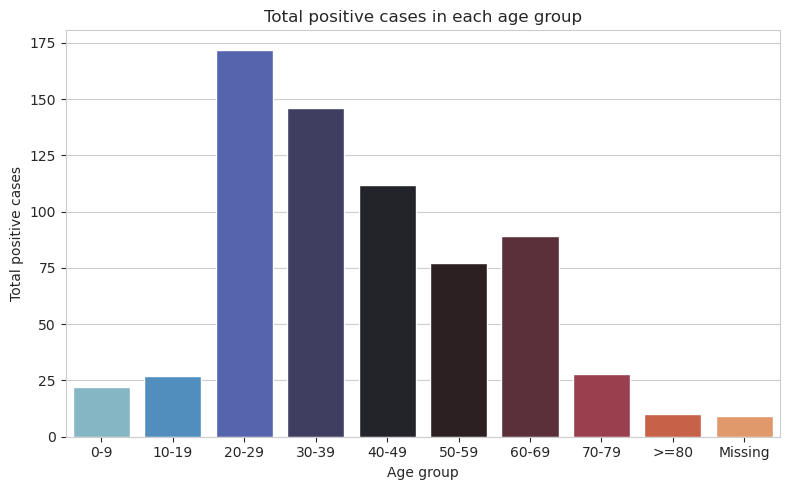

In [12]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = 'AgeGroup', y = 'TotalCases', data = age_group_details, palette = 'icefire')
plt.title('Total positive cases in each age group')
plt.xlabel('Age group')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

### 3 Total cases in India and each of its states and union territories

#### 3.1 Creating a dataframe with important data from each state/union territory as well as India

In [13]:
temp_state = covid_19_india.groupby('State/UnionTerritory').max()
temp_state.reset_index(inplace = True)
temp_state['Active'] = temp_state['Confirmed'] - (temp_state['Cured'] + temp_state['Deaths'])
temp_state = temp_state[['State/UnionTerritory', 'Confirmed', 'Cured', 'Deaths', 'Active']]
temp_state.rename(columns = {'State/UnionTerritory': 'State / Union Territory'}, inplace = True)
temp_state['State / Union Territory'] = temp_state['State / Union Territory'].apply(lambda name : 'Telangana' if name == 'Telengana' else name)

# calculate the number of cases (categorised by current health status) for India and add them to the dataframe
temp_state.loc[32] = ['India', temp_state['Confirmed'].sum(), temp_state['Cured'].sum(), temp_state['Deaths'].sum(), temp_state['Active'].sum()]
 
temp_state.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active
0,Andaman and Nicobar Islands,11,10,0,1
1,Andhra Pradesh,381,11,6,364
2,Arunachal Pradesh,1,0,0,1
3,Assam,29,0,1,28
4,Bihar,64,19,1,44


In [14]:
# calculate India's total area
total_area_india_km2 = population_india_census_2011['Area'].apply(lambda area : float(area.split('\xa0')[0].replace(',', ''))).sum()

temp_population = population_india_census_2011[['State / Union Territory', 'Population', 'Density']]
temp_population['Density (per km2)'] = temp_population['Density'].apply(lambda density : float(density.split('/')[0].replace(',', '')))
temp_population.drop(columns = ['Density'], inplace = True)

# calculate India's total population
total_population_india = temp_population['Population'].sum()

# calculate India's total population density
density_india = total_population_india / total_area_india_km2

temp_population.loc[36] = ['India', total_population_india, density_india]
temp_population.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(ind

,State / Union Territory,Population,Density (per km2)
0,Uttar Pradesh,199812341,828.0
1,Maharashtra,112374333,365.0
2,Bihar,104099452,1102.0
3,West Bengal,91276115,1029.0
4,Madhya Pradesh,72626809,236.0


In [15]:
statewise_data = pd.merge(left = temp_state, right = temp_population, on = 'State / Union Territory', how = 'inner')

# dataframe with important data from each state/union territory as well as India
statewise_data.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active,Population,Density (per km2)
0,Andaman and Nicobar Islands,11,10,0,1,380581,46.0
1,Andhra Pradesh,381,11,6,364,49577103,303.0
2,Arunachal Pradesh,1,0,0,1,1383727,17.0
3,Assam,29,0,1,28,31205576,397.0
4,Bihar,64,19,1,44,104099452,1102.0


#### 3.2 Plot

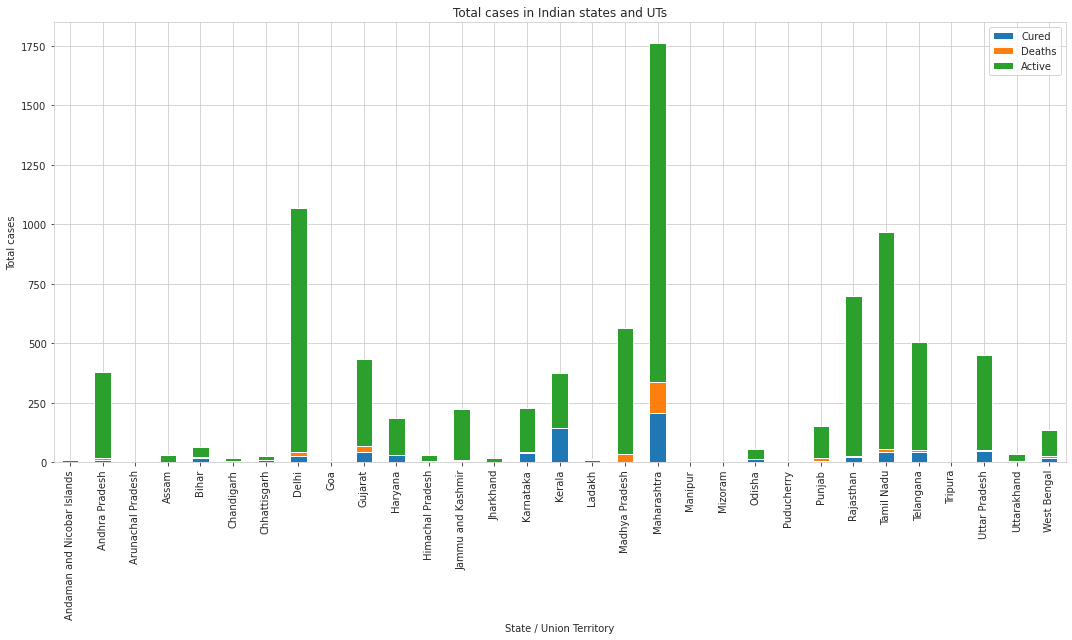

In [16]:
statewise_data.drop(31)[['State / Union Territory', 'Cured', 'Deaths', 'Active']].plot.bar(x = 'State / Union Territory', stacked = True, figsize = (15, 9))
plt.title('Total cases in Indian states and UTs')
plt.ylabel('Total cases')
plt.tight_layout()
plt.show()

#### 3.3 Number of cases in India

In [17]:
total_cases_national = statewise_data.loc[31]['Confirmed']
active_national = statewise_data.loc[31]['Active']
cured_national = statewise_data.loc[31]['Cured']
deaths_national = statewise_data.loc[31]['Deaths']
print('NUMBER OF CASES IN INDIA\n')
print(f'Total: {total_cases_national}')
print(f'Active: {active_national}')
print(f'Cured: {cured_national}')
print(f'Deaths: {deaths_national}')

NUMBER OF CASES IN INDIA

Total: 8524
Active: 7486
Cured: 765
Deaths: 273


### 4 Non-cumulative number of cases (categorised by current health status) grouped by date

#### 4.1 Creating a dataframe with number of cases (categorised by current health status) grouped by date [NON-CUMULATIVE]

In [18]:
datewise_count = individual_details[individual_details['current_status'] != 'Migrated']
datewise_count = datewise_count.groupby(['diagnosed_date', 'current_status']).count()['id'].unstack()
datewise_count.fillna(0, inplace = True)
datewise_count.reset_index(inplace = True)

# change the date format to 'YYYY-MM-DD'
datewise_count['diagnosed_date'] = datewise_count['diagnosed_date'].apply(lambda date : '-'.join(date.split('/')[::-1]))

datewise_count.sort_values('diagnosed_date', inplace = True)
datewise_count.rename(columns = {'Deceased': 'Deaths', 'Hospitalized': 'Active', 'Recovered': 'Cured'}, inplace = True)

# calculate the total number of confirmed cases
datewise_count['Confirmed'] = datewise_count['Active'] + datewise_count['Cured'] + datewise_count['Deaths']

datewise_count['Deaths'] = datewise_count['Deaths'].apply(lambda num : int(num))
datewise_count['Active'] = datewise_count['Active'].apply(lambda num : int(num))
datewise_count['Cured'] = datewise_count['Cured'].apply(lambda num : int(num))
datewise_count['Confirmed'] = datewise_count['Confirmed'].apply(lambda num : int(num))
datewise_count = datewise_count[['diagnosed_date', 'Confirmed', 'Deaths', 'Cured', 'Active']]

# dataframe with number of cases (categorised by current health status) grouped by date [NON-CUMULATIVE]
datewise_count.head()

current_status,diagnosed_date,Confirmed,Deaths,Cured,Active
42,2020-01-30,1,0,1,0
1,2020-02-02,1,0,1,0
4,2020-02-03,1,0,1,0
2,2020-03-02,2,0,2,0
5,2020-03-03,1,0,1,0


#### 4.2 Plot

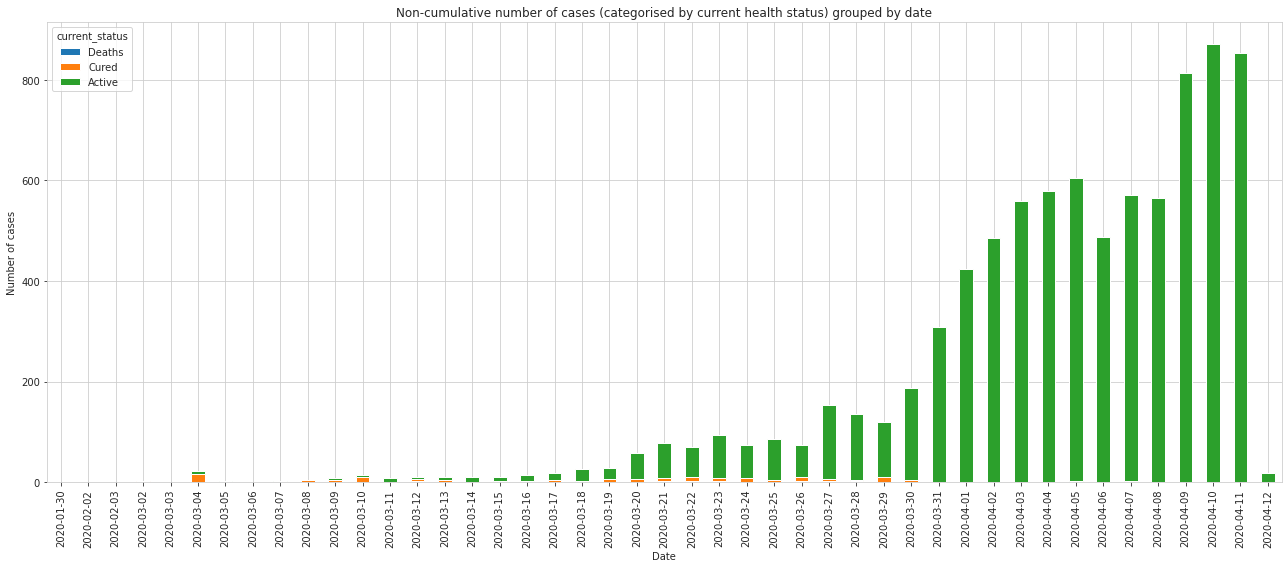

In [19]:
datewise_count.drop(columns = ['Confirmed']).plot.bar(x = 'diagnosed_date', stacked = True, figsize = (18, 8))
plt.title('Non-cumulative number of cases (categorised by current health status) grouped by date')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.tight_layout()
plt.show()

### 5 Total cases per million people in India and each of its states and union territories

#### 5.1 Calculation from available data

In [20]:
# calculate total cases per million people for each state/union territory and India
statewise_data['Total cases per million people'] = statewise_data['Confirmed'] / statewise_data['Population'] * pow(10, 6)
statewise_data.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active,Population,Density (per km2),Total cases per million people
0,Andaman and Nicobar Islands,11,10,0,1,380581,46.0,28.903177
1,Andhra Pradesh,381,11,6,364,49577103,303.0,7.684999
2,Arunachal Pradesh,1,0,0,1,1383727,17.0,0.722686
3,Assam,29,0,1,28,31205576,397.0,0.929321
4,Bihar,64,19,1,44,104099452,1102.0,0.614797


#### 5.2 Plot

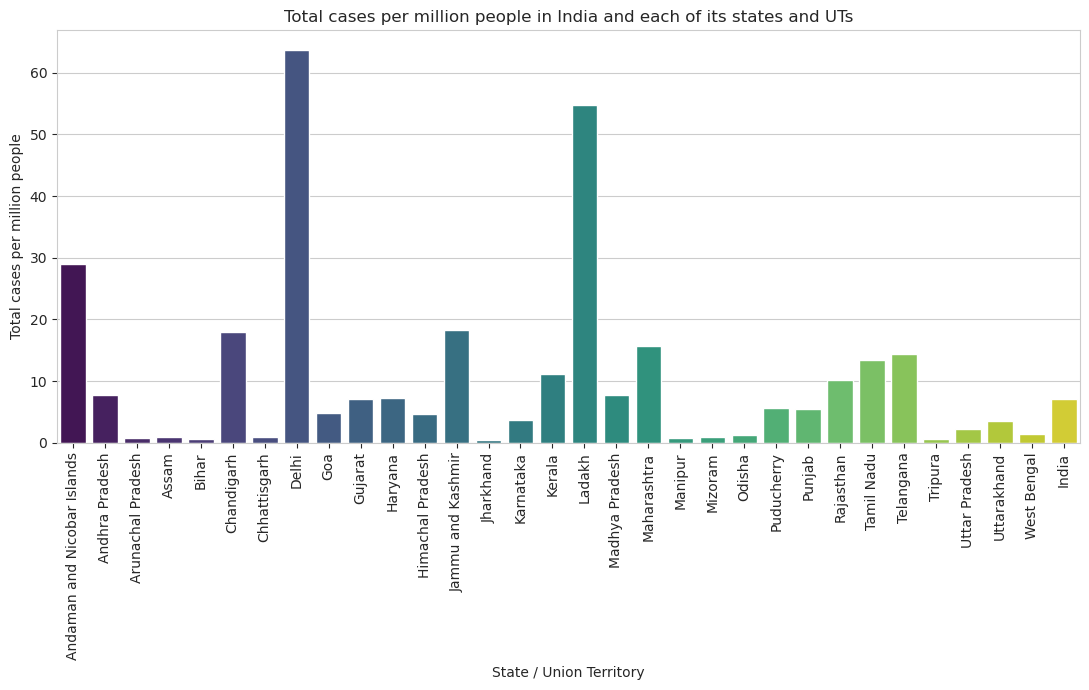

In [21]:
plt.figure(figsize=(11, 7), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Total cases per million people', data = statewise_data, palette = 'viridis')
plt.title('Total cases per million people in India and each of its states and UTs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### 6 Age distribution of positive cases in India and each of its states and union territories

#### 6.1 Data cleaning

In [22]:
# create a list of the Indian states where positive COVID-19 cases have been reported
list_of_states = list(individual_details['detected_state'].unique())

# create a list of nationalities of all the positive COVID-19 cases reported in India
list_of_nations = list(individual_details[individual_details['nationality'].isnull() == False]['nationality'].unique())

temp_age = individual_details[['age', 'detected_state', 'nationality', 'current_status']]
for i in temp_age.index:
    if temp_age.loc[i]['detected_state'] in list_of_states and temp_age.loc[i]['nationality'] not in list_of_nations:
        # assign nationality as 'India', if detected state is in the list of Indian states but nationality is not in the list of reported nationalities
        temp_age.loc[i]['nationality'] = 'India'
        
# select only those cases whose nationality is mentioned as 'India'
temp_age = temp_age[temp_age['nationality'] == 'India']

# drop the rows where age is not mentioned
temp_age.dropna(subset = ['age'], inplace = True)

# if age is mentioned as '28-35', update it with the mean value, i.e. 32 (the actual mean value is 31.5, but since we want to assign a value for age, we use 32)
temp_age['age'] = temp_age['age'].apply(lambda age : int(32) if age == '28-35' else int(age))

temp_age.head()

,age,detected_state,nationality,current_status
0,20,Kerala,India,Recovered
3,45,Delhi,India,Recovered
4,24,Telangana,India,Recovered
23,45,Uttar Pradesh,India,Recovered
25,16,Uttar Pradesh,India,Recovered


#### 6.2 Plot (States and union territories)

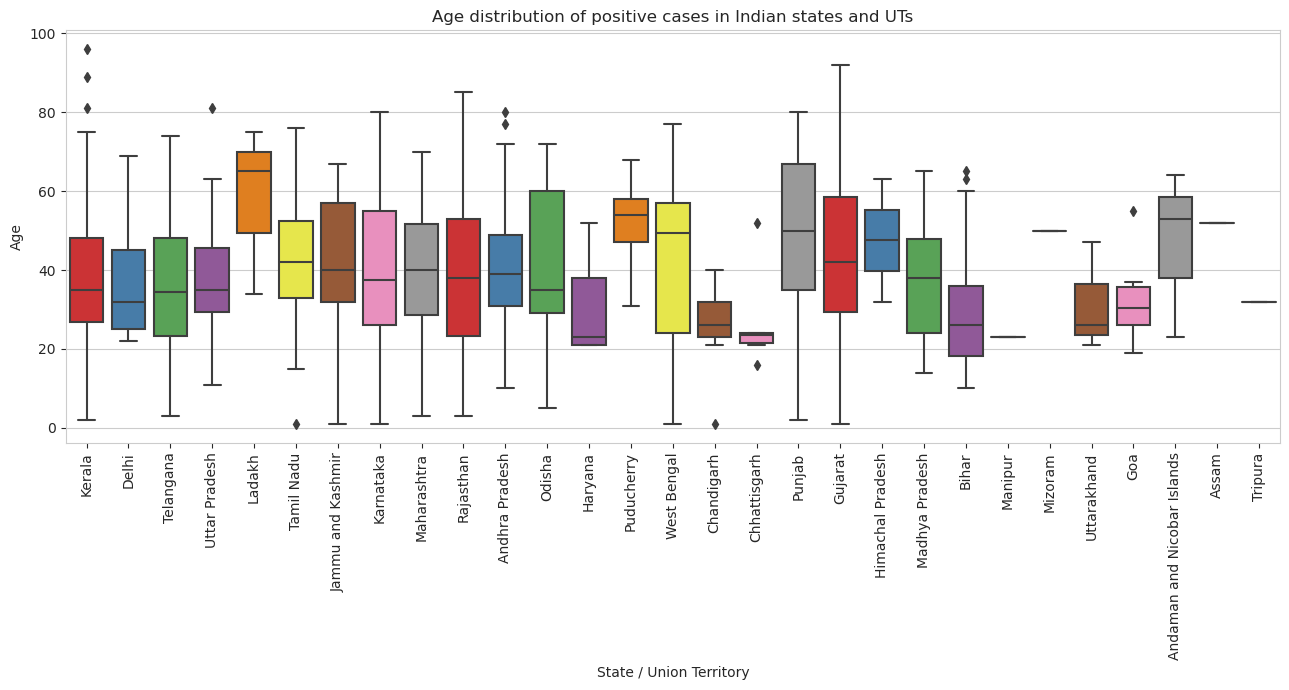

In [23]:
plt.figure(figsize=(13, 7), dpi = 100)
sns.boxplot(x = 'detected_state', y = 'age', data = temp_age, palette = 'Set1')
plt.title('Age distribution of positive cases in Indian states and UTs')
plt.xlabel('State / Union Territory')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 6.3 Plot (India)

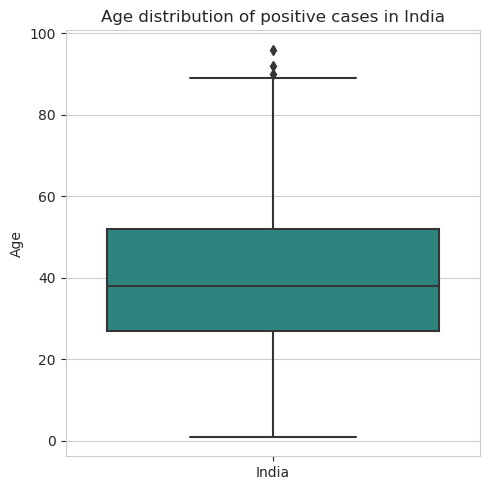

In [24]:
plt.figure(figsize=(5, 5), dpi = 100)
sns.boxplot(x = 'nationality', y = 'age', data = temp_age, palette = 'viridis')
plt.title('Age distribution of positive cases in India')
plt.xlabel('')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

### 7 National descriptive statistics (Age)

#### 7.1 Ages of all positive cases in India

In [25]:
print('NATIONAL DESCRIPTIVE STATISTICS (Ages of all positive cases in India)\n')
print(temp_age.describe()['age'])

NATIONAL DESCRIPTIVE STATISTICS (Ages of all positive cases in India)

count    1162.000000
mean       40.052496
std        16.857456
min         1.000000
25%        27.000000
50%        38.000000
75%        52.000000
max        96.000000
Name: age, dtype: float64


#### 7.2 Ages of positive cases in India (grouped by current health status)

In [26]:
print('NATIONAL DESCRIPTIVE STATISTICS (Ages of positive cases in India, grouped by current health status)\n')
print(temp_age.groupby('current_status').describe()['age'])

NATIONAL DESCRIPTIVE STATISTICS (Ages of positive cases in India, grouped by current health status)

                 count       mean        std  min    25%   50%   75%   max
current_status                                                            
Deceased          27.0  61.296296  17.397645  1.0  55.50  65.0  71.0  85.0
Hospitalized    1057.0  39.548723  16.334795  1.0  27.00  38.0  52.0  92.0
Recovered         78.0  39.525641  19.005621  1.0  24.25  35.5  51.0  96.0


### 8 Correlation between population (or, population density) and total positive cases

#### 8.1 Heat map

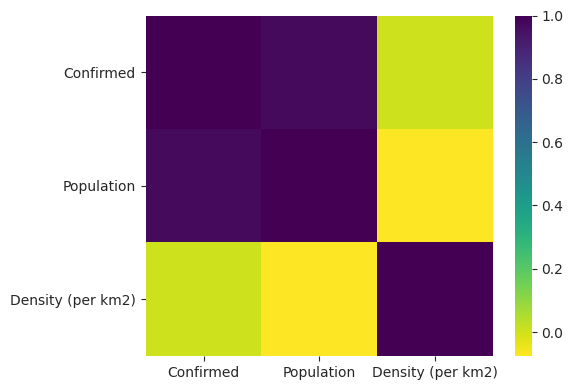

In [27]:
plt.figure(figsize=(6, 4), dpi = 100)
sns.heatmap(statewise_data.drop(columns = ['Cured', 'Deaths', 'Active', 'Total cases per million people']).corr(), cmap = 'viridis_r')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

#### 8.2 Simple linear regression (independent variable: Population, dependent variable: Total positive cases)

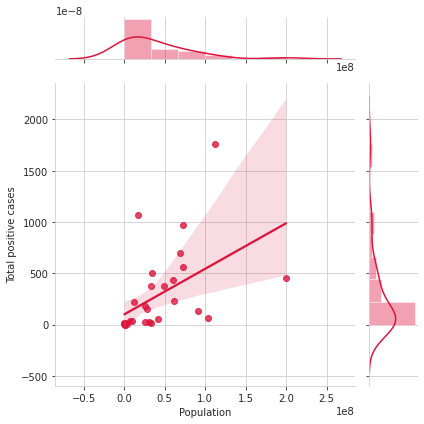

In [28]:
sns.jointplot(x = 'Population', y = 'Confirmed', data = statewise_data.drop(31), kind = 'reg', color = 'crimson')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

#### 8.3 Simple linear regression (independent variable: Density per km<sup>2</sup>, dependent variable: Total positive cases)

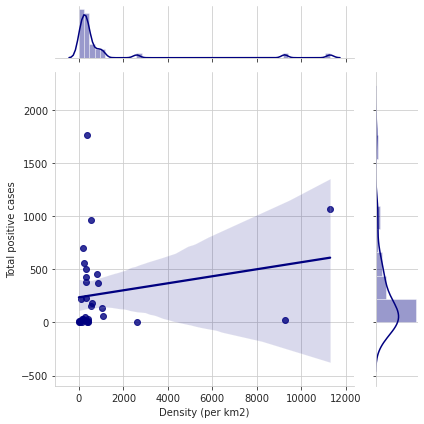

In [29]:
sns.jointplot(x = 'Density (per km2)', y = 'Confirmed', data = statewise_data.drop(31), kind = 'reg', color = 'navy')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

### 9 Public health facilities in India and each of its states and union territories

#### 9.1 Creating a dataframe with public health facility details for each state/UT and India

In [30]:
hospital_details = hospital_beds_india[['State/UT', 'TotalPublicHealthFacilities_HMIS', 'NumPublicBeds_HMIS']]
hospital_details.rename(columns = {'State/UT': 'State / Union Territory'}, inplace = True)
hospital_details['State / Union Territory'] = hospital_details['State / Union Territory'].apply(lambda name : str(name).replace('&', 'and'))
hospital_details.dropna(inplace = True)
hospital_details['TotalPublicHealthFacilities_HMIS'] = hospital_details['TotalPublicHealthFacilities_HMIS'].apply(lambda count : int(str(count).replace(',', '')))
hospital_details['NumPublicBeds_HMIS'] = hospital_details['NumPublicBeds_HMIS'].apply(lambda count : int(str(count).replace(',', '')))

# merge (or, add) the details for Dadra and Nagar Haveli & Daman and Diu (as the former UTs have been merged into a single UT) and update the dataframe
dnhdd = hospital_details[(hospital_details['State / Union Territory'] == 'Dadra and Nagar Haveli') | (hospital_details['State / Union Territory'] == 'Daman and Diu')].sum()
hospital_details.drop(index = [7, 8, 36], inplace = True)
hospital_details.loc[36] = ['Dadra and Nagar Haveli and Daman and Diu', dnhdd['TotalPublicHealthFacilities_HMIS'], dnhdd['NumPublicBeds_HMIS']]

hospital_details.sort_values('State / Union Territory', inplace = True)
hospital_details.loc[37] = ['India', hospital_details['TotalPublicHealthFacilities_HMIS'].sum(), hospital_details['NumPublicBeds_HMIS'].sum()]
hospital_details = pd.merge(left = hospital_details, right = temp_population.drop(columns = ['Density (per km2)']), on = 'State / Union Territory', how = 'inner')

# calculate public health facility details per 1000 people for each state/UT as well as India
hospital_details['TotalPublicHealthFacilities/1000 people'] = (hospital_details['TotalPublicHealthFacilities_HMIS'] / hospital_details['Population']) * 1000
hospital_details['NumPublicBeds/1000 people'] = (hospital_details['NumPublicBeds_HMIS'] / hospital_details['Population']) * 1000

# dataframe with public health facility details for each state/UT and India
hospital_details.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

,State / Union Territory,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,Population,TotalPublicHealthFacilities/1000 people,NumPublicBeds/1000 people
0,Andaman and Nicobar Islands,34,1246,380581,0.089337,3.273942
1,Andhra Pradesh,1666,60799,49577103,0.033604,1.226352
2,Arunachal Pradesh,199,2320,1383727,0.143814,1.676631
3,Assam,1220,19115,31205576,0.039096,0.612551
4,Bihar,2146,17796,104099452,0.020615,0.170952


#### 9.2 Population of each state/UT (Plot)

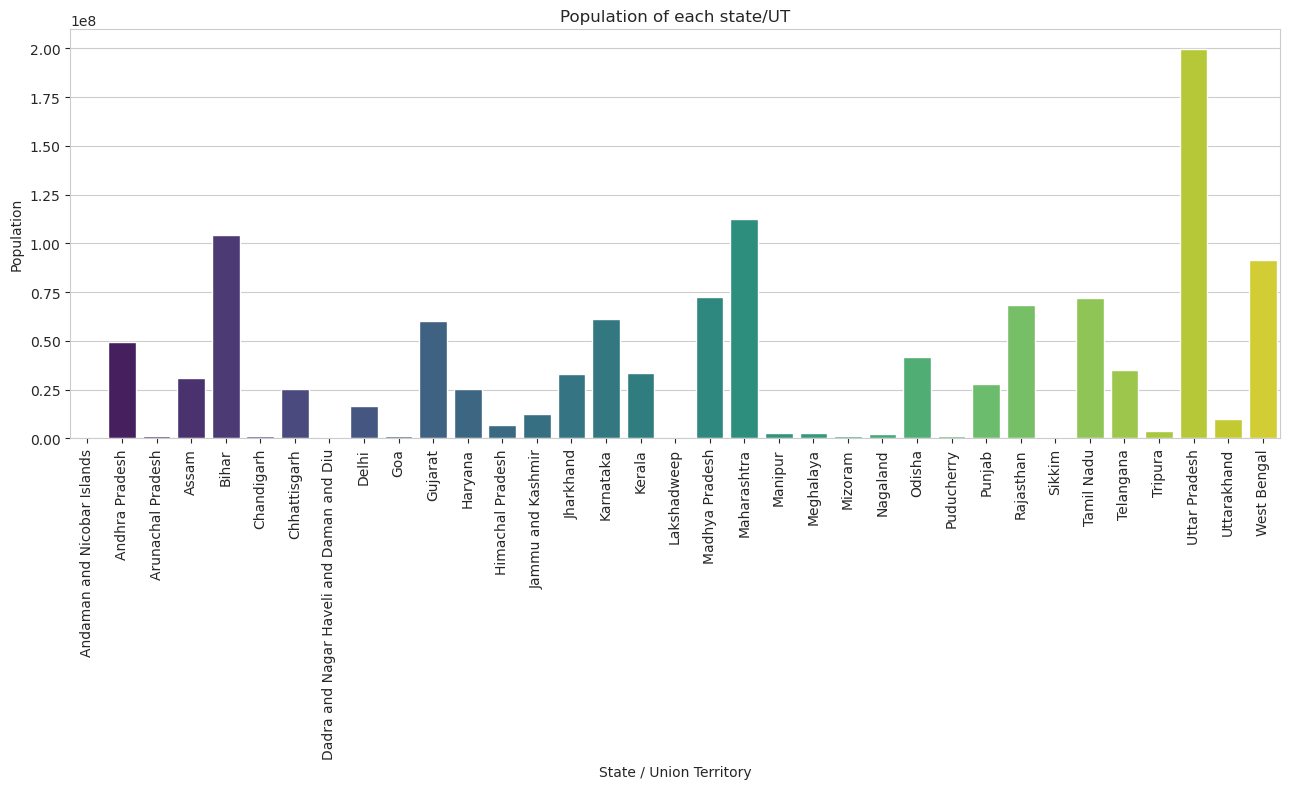

In [31]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Population', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Population of each state/UT')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 9.3 Total public health facilities in each state/UT (Plot)

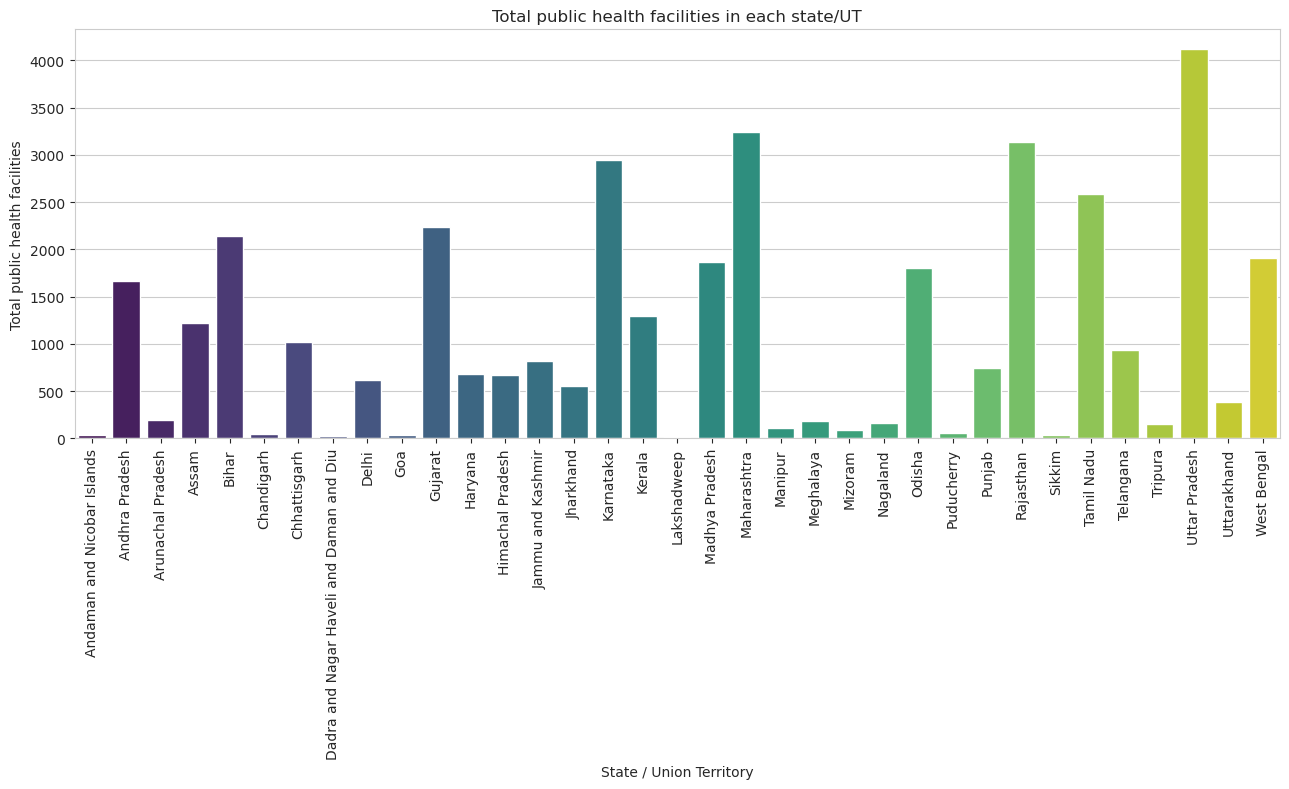

In [32]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'TotalPublicHealthFacilities_HMIS', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Total public health facilities in each state/UT')
plt.ylabel('Total public health facilities')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 9.4 Number of public beds in each state/UT (Plot)

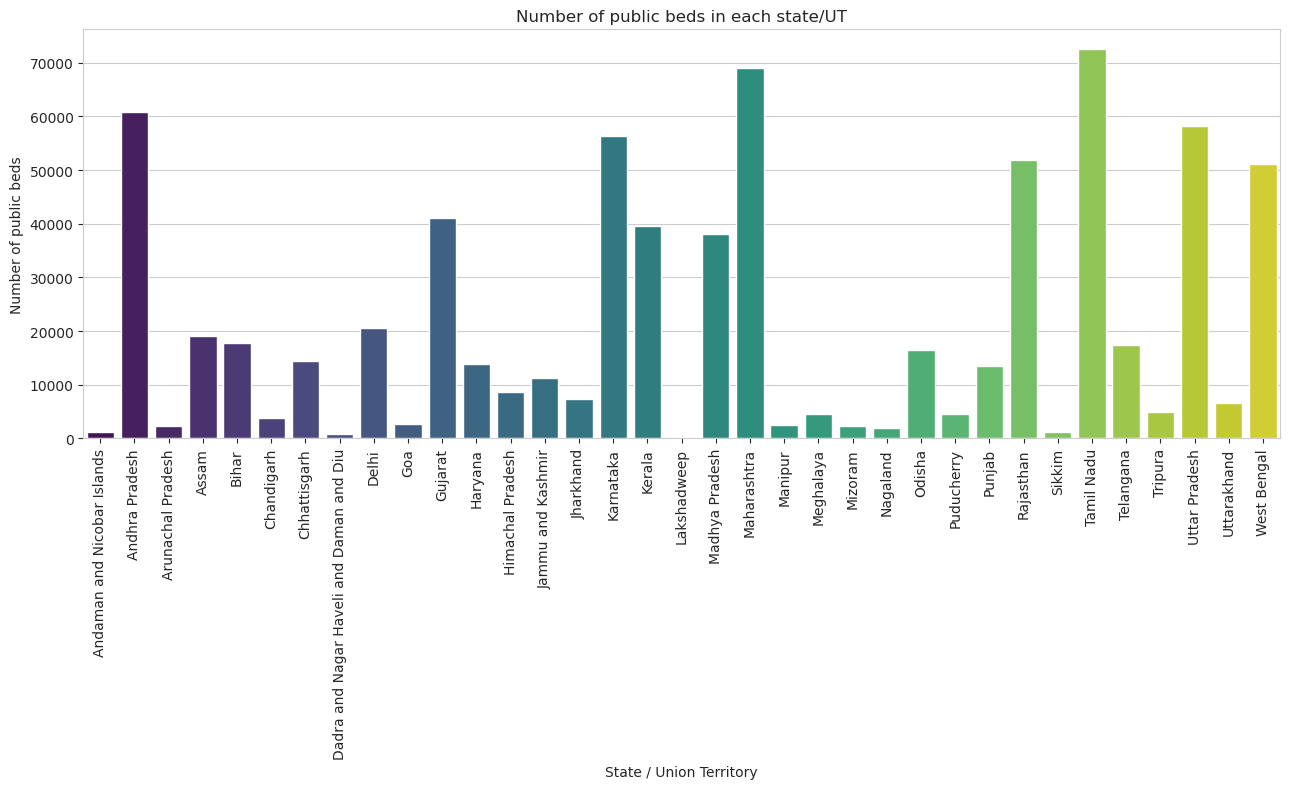

In [33]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'NumPublicBeds_HMIS', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Number of public beds in each state/UT')
plt.ylabel('Number of public beds')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 9.5 Total public health facilities per 1000 people in each state/UT and India (Plot)

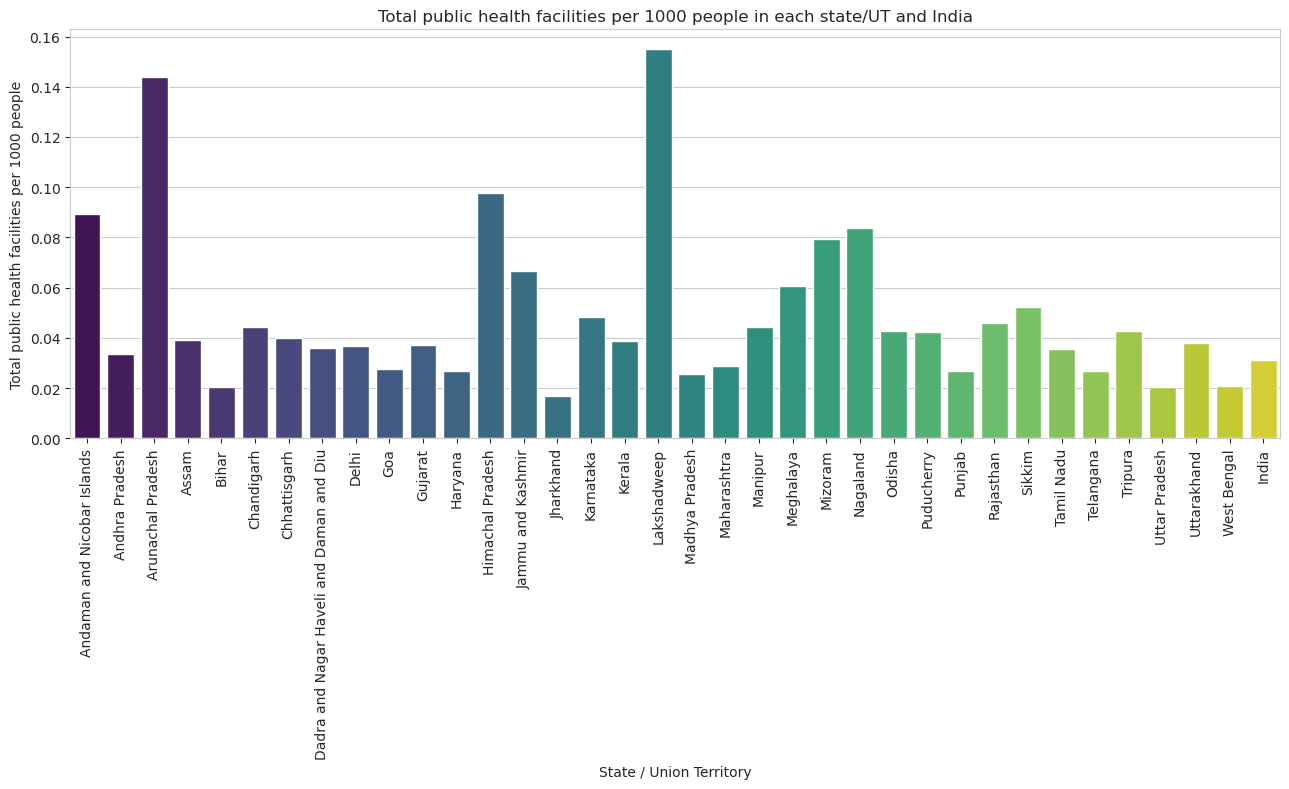

In [34]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'TotalPublicHealthFacilities/1000 people', data = hospital_details, palette = 'viridis')
plt.title('Total public health facilities per 1000 people in each state/UT and India')
plt.ylabel('Total public health facilities per 1000 people')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 9.6 Number of public beds per 1000 people in each state/UT and India (Plot)

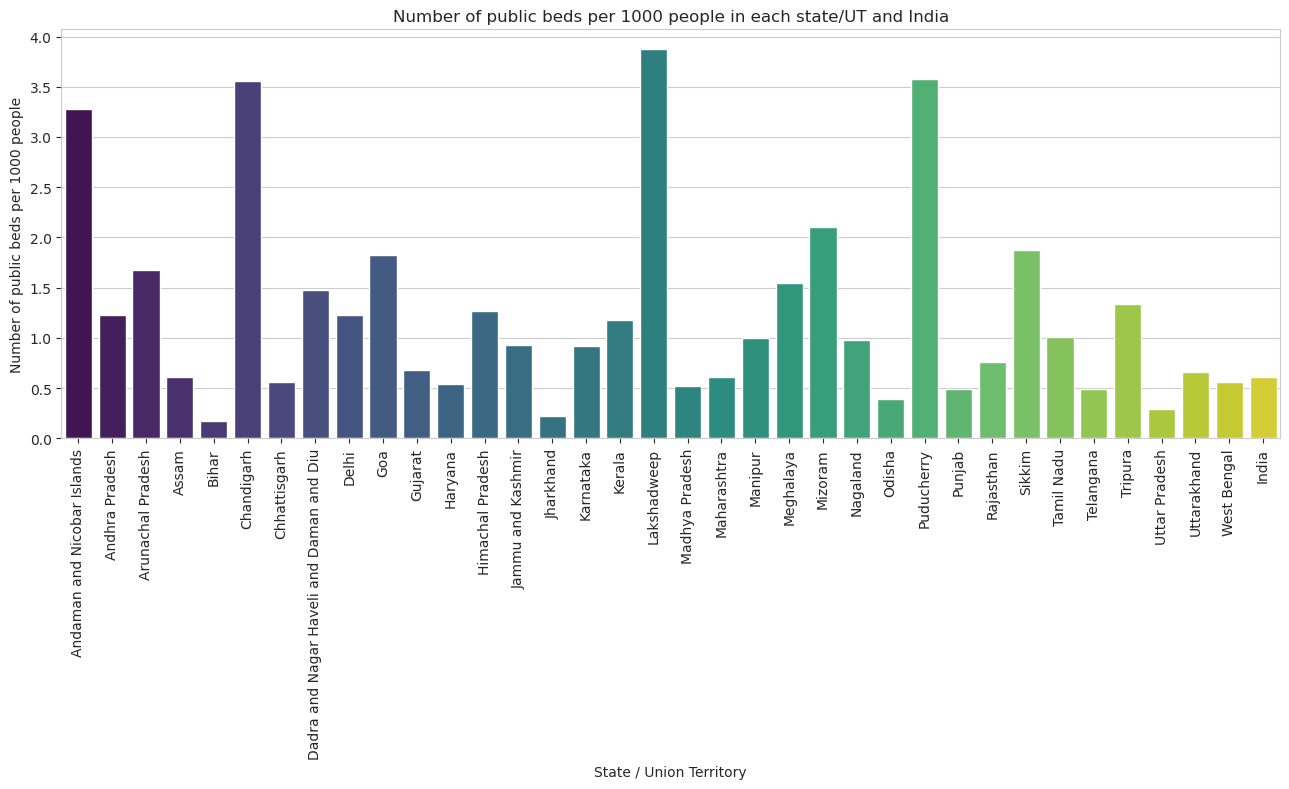

In [35]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'NumPublicBeds/1000 people', data = hospital_details, palette = 'viridis')
plt.title('Number of public beds per 1000 people in each state/UT and India')
plt.ylabel('Number of public beds per 1000 people')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 9.7 Correlation heat map

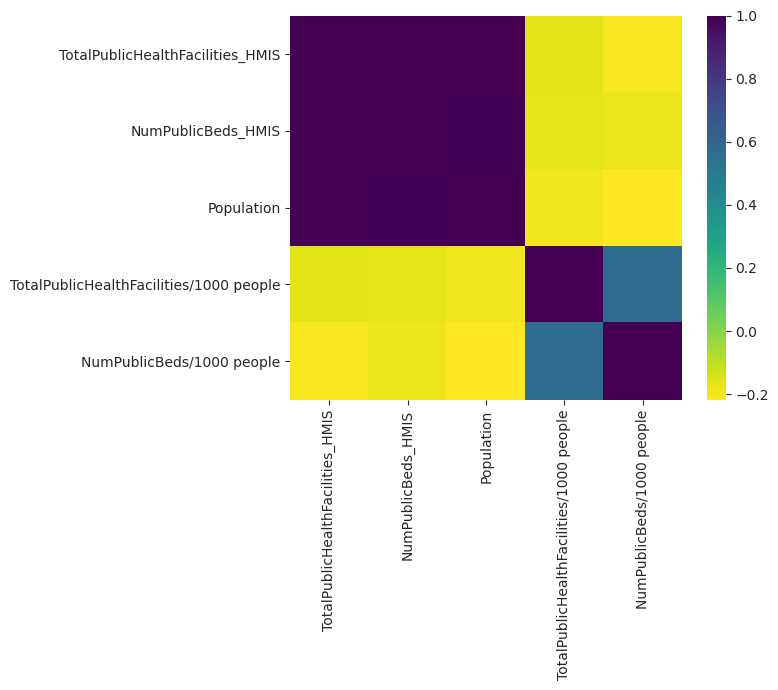

In [36]:
plt.figure(figsize=(8, 7), dpi = 100)
sns.heatmap(hospital_details.corr(), cmap = 'viridis_r')
plt.tight_layout()
plt.show()

### 10 Indian Council of Medical Research (ICMR) testing details

#### 10.1 Data cleaning

In [37]:
testing_details = icmr_testing_details[['TotalSamplesTested', 'TotalPositiveCases']]

# change the date format to 'YYYY-MM-DD'
testing_details['Date'] = icmr_testing_details['DateTime'].apply(lambda dt : '20' + '-'.join(dt.split(' ')[0].split('/')[::-1]))

testing_details = testing_details[['Date', 'TotalSamplesTested', 'TotalPositiveCases']]

# dataframe with date-wise testing details provided by the Indian Council of Medical Research (ICMR)
testing_details.head() 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,TotalSamplesTested,TotalPositiveCases
0,2020-03-13,6500.0,78.0
1,2020-03-18,13125.0,150.0
2,2020-03-19,14175.0,182.0
3,2020-03-20,15404.0,236.0
4,2020-03-21,16911.0,315.0


#### 10.2 Total samples tested and total positive cases reported on each date (Plot)

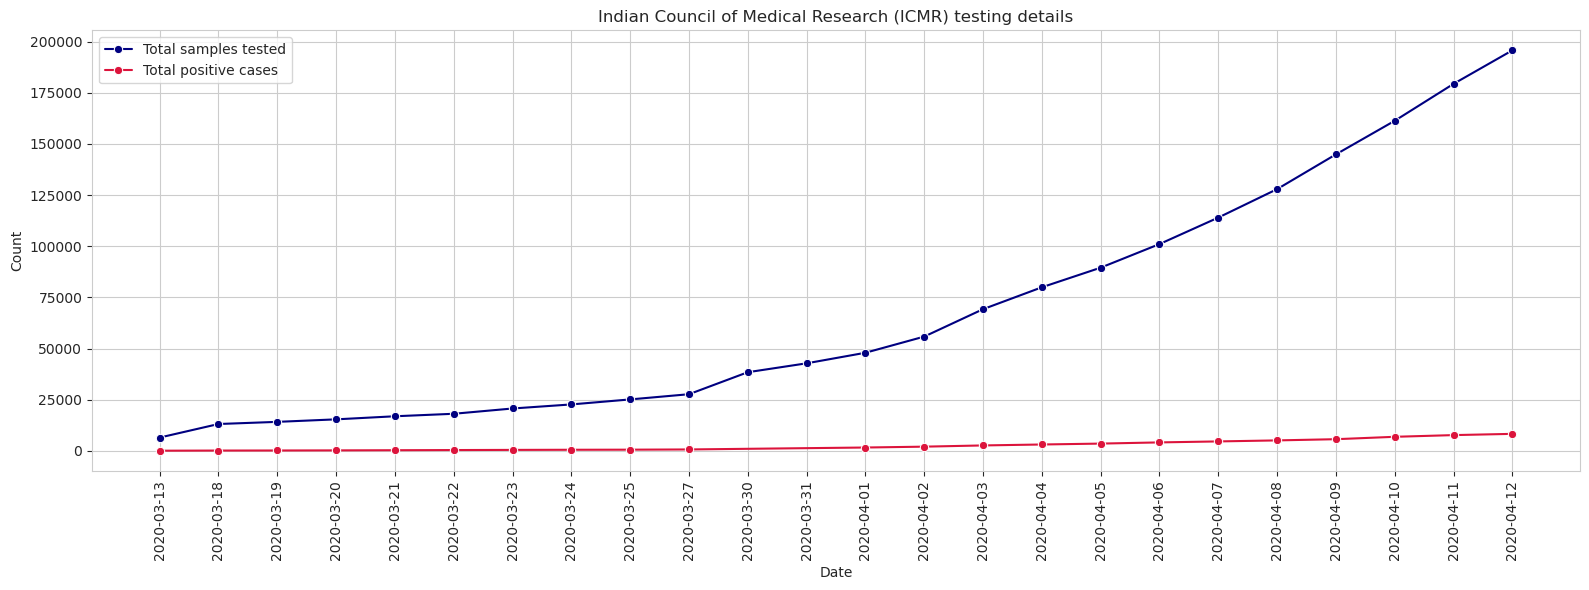

In [38]:
plt.figure(figsize=(16, 6), dpi = 100)
sns.lineplot(x = 'Date', y = 'TotalSamplesTested', data = testing_details, label = 'Total samples tested', color = 'navy', marker = 'o') 
sns.lineplot(x = 'Date', y = 'TotalPositiveCases', data = testing_details, label = 'Total positive cases', color = 'crimson', marker = 'o')
plt.title('Indian Council of Medical Research (ICMR) testing details')
plt.ylabel('Count')
plt.legend(loc = 0)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 10.3 Simple linear regression (independent variable: Total samples tested, dependent variable: Total positive cases)

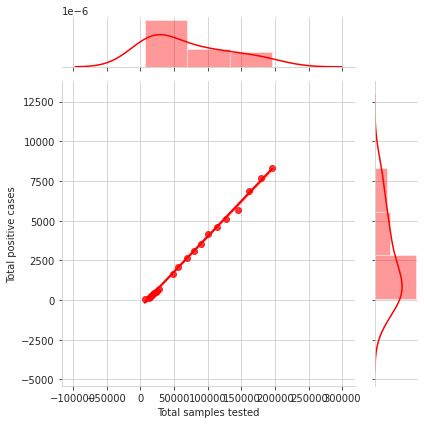

In [39]:
sns.jointplot(x = 'TotalSamplesTested', y = 'TotalPositiveCases', data = testing_details, kind = 'reg', color = 'r')
plt.xlabel('Total samples tested')
plt.ylabel('Total positive cases')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### 11 States/Union territories and districts with the highest and the lowest number of confirmed COVID-19 cases

#### 11.1 Data cleaning and creation of appropriate series

In [40]:
# series: states/UTs (highest number of confirmed COVID-19 cases)
states_highest = individual_details['detected_state'].value_counts().head(10)

# series: states/UTs (lowest number of confirmed COVID-19 cases)
states_lowest = individual_details['detected_state'].value_counts().tail(10).sort_values()

# series: districts (highest number of confirmed COVID-19 cases)
districts_highest = individual_details['detected_district'].value_counts().head(10)

#### 11.2 States/UTs (highest number of confirmed COVID-19 cases)

##### (A) Plot

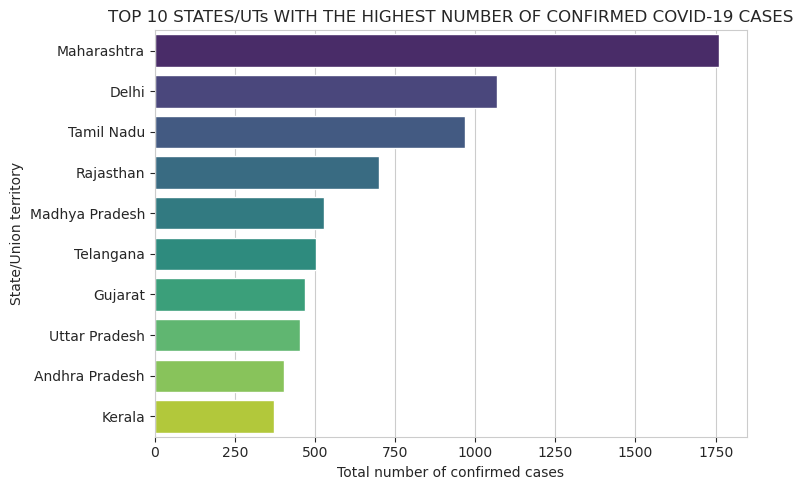

In [41]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = states_highest.values, y = states_highest.index, palette = 'viridis')
plt.title('TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('State/Union territory')
plt.tight_layout()
plt.show()

##### (B) Data table

In [42]:
print('TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(states_highest)

TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES

Maharashtra       1761
Delhi             1069
Tamil Nadu         969
Rajasthan          700
Madhya Pradesh     529
Telangana          503
Gujarat            468
Uttar Pradesh      452
Andhra Pradesh     405
Kerala             373
Name: detected_state, dtype: int64


#### 11.3 States/UTs (lowest number of confirmed COVID-19 cases)

##### (A) Plot

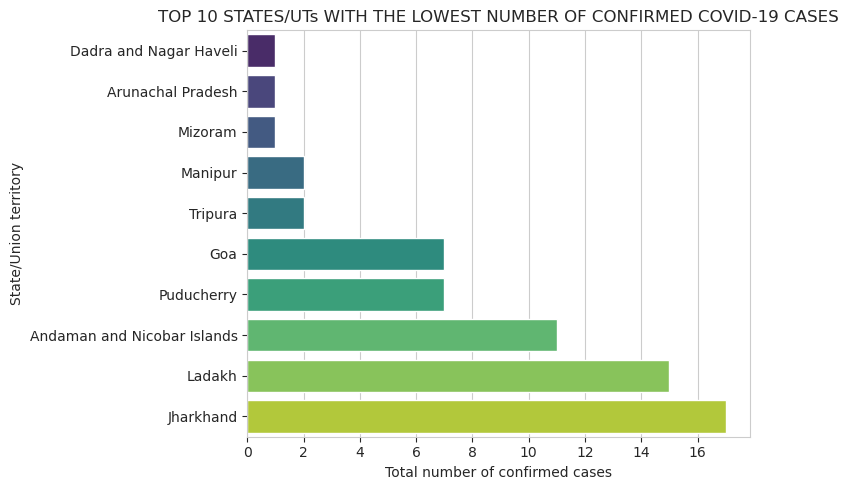

In [43]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = states_lowest.values, y = states_lowest.index, palette = 'viridis')
plt.title('TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('State/Union territory')
plt.tight_layout()
plt.show()

##### (B) Data table

In [44]:
print('TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(states_lowest)

TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES

Dadra and Nagar Haveli          1
Arunachal Pradesh               1
Mizoram                         1
Manipur                         2
Tripura                         2
Goa                             7
Puducherry                      7
Andaman and Nicobar Islands    11
Ladakh                         15
Jharkhand                      17
Name: detected_state, dtype: int64


#### 11.4 Districts (highest number of confirmed COVID-19 cases)

##### (A) Plot

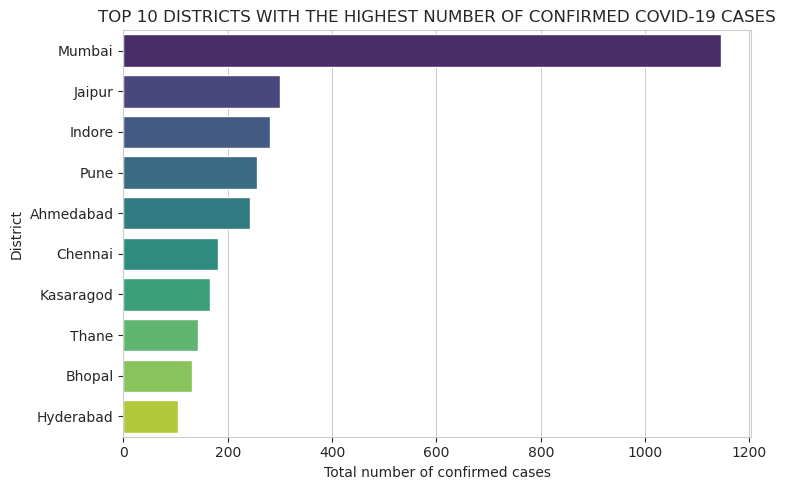

In [45]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = districts_highest.values, y = districts_highest.index, palette = 'viridis')
plt.title('TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('District')
plt.tight_layout()
plt.show()

##### (B) Data table

In [46]:
print('TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(districts_highest)

TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES

Mumbai       1146
Jaipur        301
Indore        281
Pune          257
Ahmedabad     243
Chennai       182
Kasaragod     166
Thane         143
Bhopal        131
Hyderabad     104
Name: detected_district, dtype: int64


#### 11.5 Districts (lowest number of confirmed COVID-19 cases)

In [47]:
print('DISTRICTS WITH ONLY 1 CONFIRMED COVID-19 CASE\n')
for dist, cnt in zip(individual_details['detected_district'].value_counts().index, individual_details['detected_district'].value_counts().values):
    # check if there's only 1 positive case in the district and the district name doesn't contain '*', such as 'Other Region*', 'Other States*' and 'Italians*' 
    if cnt == 1 and '*' not in dist:
        print(dist)

DISTRICTS WITH ONLY 1 CONFIRMED COVID-19 CASE

Tumakuru
Dhenkanal
Rajnandgaon
Golaghat
Bilaspur
Jind
Jalna
Gomati
Durg
Sikar
Sri Muktsar Sahib
East Delhi
Imphal West
Jagitial
Jajapur
Tenkasi
Hooghly
Mandsaur
Dhule
Morigaon
Morbi
Bhagalpur
Cuttack
Perambalur
Sindhudurg
Lakhisarai
Dahod
Saran
North and Middle Andaman
Bara Banki
Kalimpong
Dhar
Aizawl
Barmer
Jamnagar
Vijayapura
Panch Mahals
Bid
Bhubaneswar
Sabar Kantha
Washim
Lakhimpur
Shajapur
Raisen
Bijnor
Gondiya
Betul
Ariyalur
Baramula
Sangareddy
Lohit
Sirmaur
Rohtak
Howrah
Fatehabad
Ratlam
South Salmara Mancachar
Kodarma
North Tripura
North East Delhi
Sagar
Prayagraj
South 24 Parganas
Kapurthala
Hailakandi
Puri
Kamrup
Shahjahanpur
Nagaur
Moradabad
Charki Dadri
Bhadohi
Dhaulpur
Mahe
Almora
Kodagu
Gadag
Hingoli


## Important COVID-19 details of India and each of its states and union territories

In [48]:
# create a dataframe with important COVID-19 details for each Indian state/UT as well as India

# sort by total number of confirmed cases in non-ascending order
covid_19_details = statewise_data.drop(columns = ['Population', 'Density (per km2)', 'Total cases per million people']).sort_values('Confirmed', ascending = False)

# add serial number (as index) to the dataframe
covid_19_details['Sno'] = range(len(covid_19_details['State / Union Territory']))
covid_19_details.set_index('Sno', inplace = True)

print('IMPORTANT COVID-19 DETAILS OF INDIA AND EACH OF ITS STATES AND UNION TERRITORIES\n')
print(covid_19_details)

IMPORTANT COVID-19 DETAILS OF INDIA AND EACH OF ITS STATES AND UNION TERRITORIES

         State / Union Territory  Confirmed  Cured  Deaths  Active
Sno                                                               
0                          India       8524    765     273    7486
1                    Maharashtra       1761    208     127    1426
2                          Delhi       1069     25      19    1025
3                     Tamil Nadu        969     44      10     915
4                      Rajasthan        700     21       3     676
5                 Madhya Pradesh        564      0      36     528
6                      Telangana        504     43       9     452
7                  Uttar Pradesh        452     45       5     402
8                        Gujarat        432     44      22     366
9                 Andhra Pradesh        381     11       6     364
10                        Kerala        374    142       2     230
11                     Karnataka        226    